## Find Compton Getting Amplitude and Phase

In [1]:
import numpy as np
from scipy.optimize import minimize, minimize_scalar
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

**Fit funtcion**
\begin{equation}
f(t) = A + \sum_{k \in \{1,2,3\}} \left[ C_k \cos\!\left(k\omega_0 t\right) + S_k \sin\!\left(k\omega_0 t\right) \right],
\end{equation}
\begin{equation}
\text{where } \omega_0 = \frac{2\pi}{24},
\quad (C_1, S_1) = (C_{24}, S_{24}),
\quad (C_2, S_2) = (C_{12}, S_{12}),
\quad (C_3, S_3) = (C_{8}, S_{8}).
\end{equation}

**Fitted parameters**

In [2]:
#Fit Parameters including data from whole year
popt = np.array([ 0.07690179, -0.30053429, -0.09176604,  0.10117421,  0.17718606, -0.00794961, -0.03745282])

In [3]:
#Fit Parameters for each season (Summer[0], Autumn[1], Winter[2], Spring[3])
par_seasons = np.array([ [ 0.0737494 , -0.21787168, -0.12025214,  0.09169092,  0.18699432, 0.01644029, -0.03143285],
                         [ 0.06717673, -0.27210567, -0.08163803,  0.06666483,  0.18071189, -0.01744359, -0.04341184],
                         [ 0.08791679, -0.34128533, -0.15642248,  0.0991684 ,  0.1652597 , -0.0141409 , -0.04654787],
                         [ 0.08321817, -0.32016957, -0.04377432,  0.14588219,  0.16687461, -0.00105899, -0.03672633] ])

**Covariant Matrix**

In [4]:
#Covariant matrix for whole year
pcov = np.array([[ 4.31974248e-06, -1.34192594e-06, -2.44787610e-06,
         2.18975272e-07, -8.20594723e-09, -2.45899699e-07,
         3.45616190e-08],
       [-1.34192594e-06,  8.85164277e-06, -6.66423201e-09,
        -1.50774769e-06, -2.48932110e-06, -8.88837885e-08,
        -9.45600414e-09],
       [-2.44787610e-06, -6.66423201e-09,  8.43280130e-06,
         2.41668564e-06, -1.16131651e-06, -1.53302340e-07,
         4.61928141e-07],
       [ 2.18975272e-07, -1.50774769e-06,  2.41668564e-06,
         8.35759131e-06, -1.11014557e-07, -1.33616309e-06,
        -2.46689663e-06],
       [-8.20594723e-09, -2.48932110e-06, -1.16131651e-06,
        -1.11014557e-07,  8.91756814e-06,  2.54074199e-06,
        -1.22115596e-06],
       [-2.45899699e-07, -8.88837885e-08, -1.53302340e-07,
        -1.33616309e-06,  2.54074199e-06,  7.61548372e-06,
         1.87874786e-07],
       [ 3.45616190e-08, -9.45600414e-09,  4.61928141e-07,
        -2.46689663e-06, -1.22115596e-06,  1.87874786e-07,
         7.58969139e-06]])

In [5]:
#Covariant matrix for summer
pcov_summer = np.array([[ 2.02682510e-05, -1.28028288e-05, -1.36252436e-05,
         5.89157389e-07,  7.66445103e-09, -1.19061886e-06,
         1.78044424e-06],
       [-1.28028288e-05,  4.10477902e-05, -8.81980269e-08,
        -1.34676654e-05, -1.18929835e-05,  8.94462112e-08,
         6.39369058e-07],
       [-1.36252436e-05, -8.81980269e-08,  3.97797434e-05,
         1.54847462e-05, -1.21107966e-05, -1.85368390e-06,
         1.63774584e-06],
       [ 5.89157389e-07, -1.34676654e-05,  1.54847462e-05,
         4.06996022e-05, -1.04853062e-07, -1.25571768e-05,
        -1.54774976e-05],
       [ 7.66445103e-09, -1.18929835e-05, -1.21107966e-05,
        -1.04853062e-07,  4.02415091e-05,  1.16478765e-05,
        -1.14473799e-05],
       [-1.19061886e-06,  8.94462112e-08, -1.85368390e-06,
        -1.25571768e-05,  1.16478765e-05,  3.02863649e-05,
         1.89152953e-06],
       [ 1.78044424e-06,  6.39369058e-07,  1.63774584e-06,
        -1.54774976e-05, -1.14473799e-05,  1.89152953e-06,
         2.86963690e-05]])

In [6]:
#Covariant matrix for autumn
pcov_autumn = np.array([[ 9.95874344e-06, -4.97651356e-06, -4.73296299e-06,
         3.04819525e-06,  1.83994084e-06, -7.12115352e-07,
        -1.41733219e-06],
       [-4.97651356e-06,  2.28232407e-05,  1.82418246e-06,
        -5.43455341e-06, -5.95875669e-06,  2.54491526e-06,
         1.58193119e-06],
       [-4.73296299e-06,  1.82418246e-06,  1.67190515e-05,
         3.23884413e-06, -4.02441115e-06, -1.89238701e-06,
         2.42130590e-06],
       [ 3.04819525e-06, -5.43455341e-06,  3.23884413e-06,
         1.93093372e-05, -2.00428060e-07, -3.76239339e-06,
        -4.77461601e-06],
       [ 1.83994084e-06, -5.95875669e-06, -4.02441115e-06,
        -2.00428060e-07,  1.91565574e-05,  5.10752654e-06,
        -3.61230972e-06],
       [-7.12115352e-07,  2.54491526e-06, -1.89238701e-06,
        -3.76239339e-06,  5.10752654e-06,  1.68278225e-05,
        -2.08571342e-07],
       [-1.41733219e-06,  1.58193119e-06,  2.42130590e-06,
        -4.77461601e-06, -3.61230972e-06, -2.08571342e-07,
         1.71752979e-05]])

In [7]:
#Covariant matrix for winter
pcov_winter = np.array([[ 1.45942433e-05, -4.61838964e-06, -4.84216748e-06,
         2.53313367e-06,  3.44549557e-06,  9.30965464e-07,
        -2.34728191e-06],
       [-4.61838964e-06,  3.14388015e-05,  3.47149039e-06,
        -3.48885085e-06, -6.84379613e-06,  2.21744609e-06,
         2.47133296e-06],
       [-4.84216748e-06,  3.47149039e-06,  2.64900686e-05,
         2.26624434e-06, -5.37841592e-06, -3.50086801e-06,
         2.34878528e-06],
       [ 2.53313367e-06, -3.48885085e-06,  2.26624434e-06,
         2.85792972e-05, -4.89231930e-07, -4.26926400e-06,
        -4.72861084e-06],
       [ 3.44549557e-06, -6.84379613e-06, -5.37841592e-06,
        -4.89231930e-07,  2.83457048e-05,  4.29853110e-06,
        -3.00180539e-06],
       [ 9.30965464e-07,  2.21744609e-06, -3.50086801e-06,
        -4.26926400e-06,  4.29853110e-06,  2.75695398e-05,
        -8.07420461e-07],
       [-2.34728191e-06,  2.47133296e-06,  2.34878528e-06,
        -4.72861084e-06, -3.00180539e-06, -8.07420461e-07,
         2.69458487e-05]])

In [8]:
#Covariant matrix for spring
pcov_spring = np.array([[ 1.20329233e-05, -4.26726496e-06, -8.65391796e-06,
        -1.49059483e-06, -7.00577986e-07, -2.16781086e-07,
         2.12623533e-06],
       [-4.26726496e-06,  2.24634875e-05, -6.68600985e-07,
        -4.07740184e-06, -6.57192696e-06, -1.46726373e-06,
        -1.04074538e-06],
       [-8.65391796e-06, -6.68600985e-07,  2.53362695e-05,
         1.05597023e-05, -4.42677993e-06, -6.85288528e-07,
         9.09705585e-08],
       [-1.49059483e-06, -4.07740184e-06,  1.05597023e-05,
         2.31517618e-05, -7.33359867e-07, -4.40709676e-06,
        -8.46645269e-06],
       [-7.00577986e-07, -6.57192696e-06, -4.42677993e-06,
        -7.33359867e-07,  2.45994104e-05,  8.14613143e-06,
        -4.59421573e-06],
       [-2.16781086e-07, -1.46726373e-06, -6.85288528e-07,
        -4.40709676e-06,  8.14613143e-06,  1.92415802e-05,
         1.43908601e-06],
       [ 2.12623533e-06, -1.04074538e-06,  9.09705585e-08,
        -8.46645269e-06, -4.59421573e-06,  1.43908601e-06,
         1.95135219e-05]])

In [9]:
#Merge covariant matrix for all seasons
pcov_seasons = [ pcov_summer, pcov_autumn, pcov_winter, pcov_spring]

**Code for function $f(t)$ and error propagation**

In [10]:
# --- Harmonics + 8h harmonic ---
def model_harmonics_8h(t, A, C24, S24, C12, S12, C8, S8):
    return (A
            + C24*np.cos((2*np.pi/24.0)*t) + S24*np.sin((2*np.pi/24.0)*t)
            + C12*np.cos((2*np.pi/12.0)*t) + S12*np.sin((2*np.pi/12.0)*t)
            + C8 *np.cos((2*np.pi/8.0)*t)  + S8 *np.sin((2*np.pi/8.0)*t))

def model_harmonics_8h_error(t, popt, pcov):
    A, C24, S24, C12, S12, C8, S8 = popt
    w24 = 2*np.pi/24
    w12 = 2*np.pi/12
    w8  = 2*np.pi/8
    
    # Partial derivatives w.r.t each parameter
    df_dA    = np.ones_like(t)
    df_dC24  = np.cos(w24*t)
    df_dS24  = np.sin(w24*t)
    df_dC12  = np.cos(w12*t)
    df_dS12  = np.sin(w12*t)
    df_dC8   = np.cos(w8*t)
    df_dS8   = np.sin(w8*t)
    
    # Stack derivatives into Jacobian: shape (len(t), n_params)
    J = np.vstack([df_dA, df_dC24, df_dS24, df_dC12, df_dS12, df_dC8, df_dS8]).T
    
    # Propagate errors: sigma^2 = J @ cov @ J^T (for each t)
    sigma_f2 = np.sum(J @ pcov * J, axis=1)  # efficient element-wise multiplication
    sigma_f2 = np.clip(sigma_f2, 0, None)   # avoid small negative numbers due to numerical error
    sigma_f = np.sqrt(sigma_f2)
    
    return sigma_f

**Plot $f(t)$ in the interval (0,9), whole year**

(-0.13, -0.03)

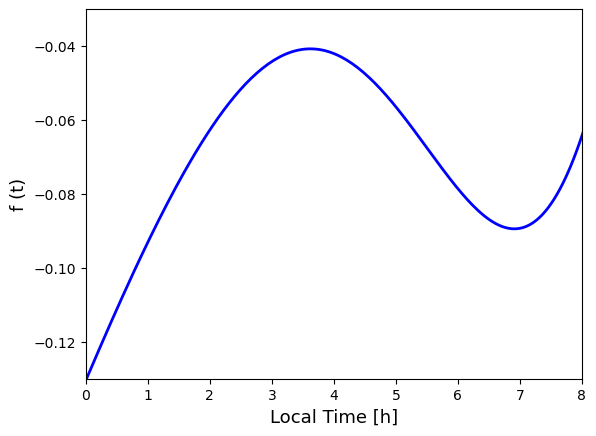

In [11]:
t = np.linspace(0,9,200)
plt.plot(t,model_harmonics_8h(t,*popt),c='b',lw=2 )
plt.xlabel('Local Time [h]', fontsize=13)
plt.ylabel('f (t)', fontsize=13)
plt.xlim(0,8)
plt.ylim(-0.13,-0.03)

**Plot $f(t)$ in the interval (0,8), for each season**

(-0.17, 0.01)

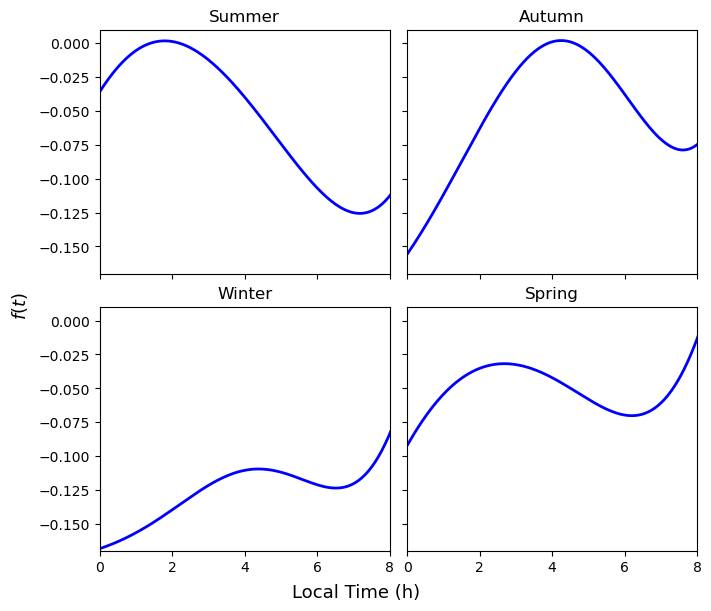

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True, constrained_layout=True)
seasons = ["Summer", "Autumn", "Winter", "Spring"]
ax[0,0].plot(t,model_harmonics_8h(t,*par_seasons[0]),c='b',lw=2 )
ax[0,0].set_title(seasons[0], fontsize=12)
ax[0,1].plot(t,model_harmonics_8h(t,*par_seasons[1]),c='b',lw=2 )
ax[0,1].set_title(seasons[1], fontsize=12)
ax[1,0].plot(t,model_harmonics_8h(t,*par_seasons[2]),c='b',lw=2 )
ax[1,0].set_title(seasons[2], fontsize=12)
ax[1,1].plot(t,model_harmonics_8h(t,*par_seasons[3]),c='b',lw=2 )
ax[1,1].set_title(seasons[3], fontsize=12)
fig.supxlabel('Local Time (h)', fontsize=13)
fig.supylabel(r'$f (t)$', fontsize=13)
plt.xlim(0,8)
plt.ylim(-0.17,0.01)

**Now, let us find the maximum and miminum of $f(t)$ in the interval [0,8], numericaly, for whole year**

In [13]:
fp_max = lambda x: -1*model_harmonics_8h(x,*popt)
fp_min = lambda x: model_harmonics_8h(x,*popt)

In [14]:
#Maximum
max_func = minimize_scalar(fp_max,bracket=(2,3,5))
max_func

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.04074758589538599
       x: 3.6215146936372187
     nit: 8
    nfev: 11

In [15]:
phase_1 = max_func.x
A1 = -1*max_func.fun
print(A1)
print(phase_1)

-0.04074758589538599
3.6215146936372187


In [16]:
#Minimum
min_func= minimize_scalar(fp_min,bracket=(5.5,6,8))
min_func

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.08944340263927691
       x: 6.910345378411075
     nit: 10
    nfev: 13

In [17]:
phase_2 = min_func.x
A2 = min_func.fun
print(A2)
print(phase_2)

-0.08944340263927691
6.910345378411075


In [18]:
#Amplitude:
A = np.abs(A1 - A2)
print(A)

0.048695816743890924


**Now we propagate the amplitude errors**

In [19]:
err_A1 = model_harmonics_8h_error(phase_1, popt, pcov)
err_A1

array([0.0037152])

In [20]:
err_A2 = model_harmonics_8h_error(phase_2, popt, pcov)
err_A2

array([0.0037963])

**Now we calculate the subtraction error**

In [21]:
err_A = np.sqrt(err_A1**2 + err_A2**2)
err_A

array([0.00531174])

**Amplitude result for whole year**

In [22]:
print(f'Ampitude = {A:.3f} +/- {err_A[0]:.3f}')

Ampitude = 0.049 +/- 0.005


**Repeat this analysis for each season**

In [23]:
phase = []
amp = []
err_amp = []
amp_max = []
amp_min = []
interval_max = [ (0,2,4), (2,4,6), (2,4,6), (1,3,4) ]
for k in range(4):
    fp_max = lambda x: -1*model_harmonics_8h(x,*par_seasons[k])
    fp_min = lambda x: model_harmonics_8h(x,*par_seasons[k])
    max_func = minimize_scalar(fp_max,bracket=interval_max[k] )
    phi_1 = max_func.x
    phase.append(phi_1)
    A_1 = -1*max_func.fun
    min_func= minimize_scalar(fp_min,bracket=(5,7,9))
    phi_2 = min_func.x 
    A_2 = min_func.fun
    err_A_1 = model_harmonics_8h_error(phi_1, par_seasons[k], pcov_seasons[k])
    err_A_2 = model_harmonics_8h_error(phi_2, par_seasons[k], pcov_seasons[k])
    #print(err_A_1)
    amp_max.append(A_1)
    amp_min.append(A_2)
    amp.append( np.abs(A_1 - A_2) )    
    err_amp.append( np.sqrt(err_A_1**2 + err_A_2**2) )

**Print results for seasons**

In [24]:
print(f'{'Season':10} {'A_max':10} {'A_min':10}  {'Amp +/ error_A':20} {'phase'}')
print('---------------------------------------------------------')
for k in range(4):    
    print(f'{seasons[k]:5} {amp_max[k]:10.3f} {amp_min[k]:10.3f} {amp[k]:10.3f} +/- {err_amp[k][0]:5.3f} {phase[k]:10.3f} ')

Season     A_max      A_min       Amp +/ error_A       phase
---------------------------------------------------------
Summer      0.002     -0.126      0.127 +/- 0.010      1.797 
Autumn      0.002     -0.079      0.081 +/- 0.008      4.247 
Winter     -0.110     -0.124      0.014 +/- 0.012      4.386 
Spring     -0.032     -0.070      0.038 +/- 0.007      2.680 


**Let us perform a MC simulation to estimate the amplitude and phase errors . We generate N samples acording to the fit function.**

In [71]:
#Generate random parameters according to a multidimensional Gaussian. The Guassian mean values are the fitted parameters.
N = 1200
n_samples = np.random.multivariate_normal(popt, pcov, size=N)
#n_samples[:2]

In [63]:
#Now lets find the maximim of each f(t) for the N functions
phase_array = np.zeros(N)
amplitude_max = np.zeros(N)
for i in range(N):
    fp_max = lambda x: -1*model_harmonics_8h(x,*n_samples[i])
    max_func = minimize_scalar(fp_max,bracket=(2,3,5))
    amplitude_max[i] = -1*max_func.fun
    phase_array[i] = max_func.x

In [72]:
#Now lets find the mininum of each f(t) for the N functions
amplitude_min = np.zeros(N)
for i in range(N):
    fp_min = lambda x: model_harmonics_8h(x,*n_samples[i])
    min_func= minimize_scalar(fp_min,bracket=(5.5,6,8))
    amplitude_min[i] = min_func.fun

done


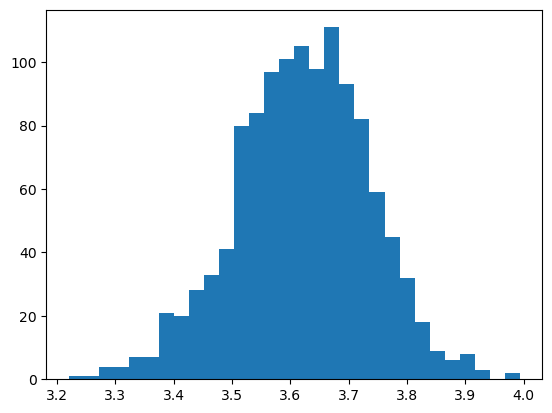

In [61]:
plt.hist(phase_array,bins=30)
print('done')

done


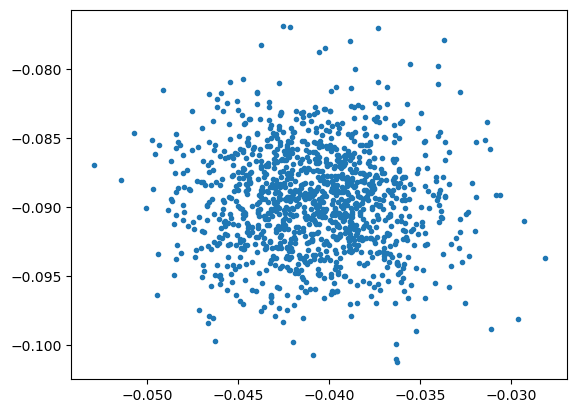

In [76]:
#plt.hist(amplitude_min,bins=30)
plt.scatter(amplitude_max,amplitude_min,marker='.')
print('done')

**Estimate the phase (single value) error**

In [60]:
phase_err = phase_array.std()
print(phase_err)

0.11483390685772446


In [77]:
#Phase for whole year
print(f'phase = {phase_1:.2f} +/- {phase_err:.2f}')

phase = 3.62 +/- 0.11


**Estimate the amplitude (single value) error**

In [81]:
Amp = np.abs(amplitude_max - amplitude_min)
err_Amp = Amp.std()
print(f'Amp = {A:.3f} +/- {err_Amp:.3f}')

Amp = 0.049 +/- 0.005


**Repeat for each season**

In [117]:
#Summer
N = 2000
phi_error = [0,0,0,0]
amp_error = [0,0,0,0]
interval_max = [ (0,2,4), (2,4,6), (1,4,6), (1,3,6) ]
interval_min = [ (4,6,9), (3,7,9), (5,6,8), (5,6,8) ]
for j in range(4):
    n_samples_seasons = np.random.multivariate_normal(par_seasons[j], pcov_seasons[j], size=N)
    amplitude_max = np.zeros(N)
    amplitude_min = np.zeros(N)
    phase_array = np.zeros(N)
    if j == 2: continue    
    #print(j)
    for i in range(N):
        fp_max = lambda x: -1*model_harmonics_8h(x,*n_samples_seasons[i])
        fp_min = lambda x: model_harmonics_8h(x,*n_samples_seasons[i])
        max_func = minimize_scalar(fp_max,bracket=interval_max[j])        
        min_func= minimize_scalar(fp_min,bracket=interval_min[j])
        amplitude_max[i] = max_func.fun
        amplitude_min[i] = min_func.fun         
        phase_array[i] = max_func.x
    Amp = np.abs(amplitude_max - amplitude_min)
    amp_error[j] = Amp.std()
    phi_error[j] = phase_array.std() 

In [118]:
amp_error

[np.float64(0.009376077828110927),
 np.float64(0.007887670986551984),
 0,
 np.float64(0.006723576106009248)]

In [119]:
phi_error

[np.float64(0.1800152458269726),
 np.float64(0.10469502367852888),
 0,
 np.float64(0.2325883582261868)]

In [135]:
#Th method above does not work for winter. Here we calculate the phase error for winter using find_peaks method.
j = 2
N = 10000
tt = np.linspace(0,9,1000)
phase_array = np.zeros(N)
amp_array = np.zeros(N)
n_samples_seasons = np.random.multivariate_normal(par_seasons[j], pcov_seasons[j], size=N)
for i in range(N):
    sampled_fit = model_harmonics_8h(tt,*n_samples_seasons[i])
    sampled_peaks_max, _ = find_peaks(sampled_fit, prominence=1e-6)
    sampled_peaks_min, _ = find_peaks(-1*sampled_fit, prominence=1e-6)
    if sampled_peaks_max.size < 1: continue
    phase_array[i] = tt[sampled_peaks_max][0]
    amp_array[i] = np.abs(sampled_fit[sampled_peaks_max][0] - sampled_fit[sampled_peaks_min][0])
phi_error[j] = phase_array.std()
amp_error[j] = amp_array.std()
print('Phase error for winter: ', phi_error[j])
print('Amplitude error for winter: ', amp_error[j])

Phase error for winter:  0.5764347769038457
Amplitude error for winter:  0.010732942017686783


In [140]:
print(f'{'Season':10} {'Amp +/ error_A':20} {'phase +/- error_phi'}')
print('---------------------------------------------------------')
for k in range(4):    
    print(f'{seasons[k]:5} {amp[k]:10.3f} +/- {amp_error[k]:5.3f} {phase[k]:10.2f} +/- {phi_error[k]:5.2f}')
print(f'{'All':11} {A:.3f} +/- {err_Amp:.3f} {phase_1:10.2f} +/- {phase_err:5.2f}')

Season     Amp +/ error_A       phase +/- error_phi
---------------------------------------------------------
Summer      0.127 +/- 0.009       1.80 +/-  0.18
Autumn      0.081 +/- 0.008       4.25 +/-  0.10
Winter      0.014 +/- 0.011       4.39 +/-  0.58
Spring      0.038 +/- 0.007       2.68 +/-  0.23
All         0.049 +/- 0.005       3.62 +/-  0.11
